In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/global_traffic_accidents_dataset.csv')
print(df.head())
print(df.info())

  Accident ID        Date   Time           Location   Latitude   Longitude  \
0    b0dd6f57  2023-04-19  06:39      Mumbai, India  13.488432  -73.290682   
1    debfad09  2023-01-17  02:47  São Paulo, Brazil -37.798317  -32.244242   
2    6d69aa36  2024-04-09  02:55  Sydney, Australia  33.767869  104.869018   
3    425bb1f0  2023-10-10  11:23       Tokyo, Japan  -0.378031 -165.825855   
4    90d5cf62  2023-01-02  12:07     Beijing, China  41.254879  -30.776959   

  Weather Condition Road Condition  Vehicles Involved  Casualties  \
0              Snow          Snowy                  5           7   
1             Clear            Icy                  4           1   
2              Rain          Snowy                  1           7   
3             Storm            Wet                  4           0   
4             Storm          Snowy                  3           9   

              Cause  
0  Reckless Driving  
1     Drunk Driving  
2  Reckless Driving  
3     Drunk Driving  
4  Rec

In [3]:
# Missing values are checked for each column
print("Missing values:\n", df.isna().sum())

Missing values:
 Accident ID          0
Date                 0
Time                 0
Location             0
Latitude             0
Longitude            0
Weather Condition    0
Road Condition       0
Vehicles Involved    0
Casualties           0
Cause                0
dtype: int64


In [4]:
#accidents by city
accident_count_by_location = df["Location"].value_counts()
print(accident_count_by_location)

Location
São Paulo, Brazil    1032
New York, USA        1016
Beijing, China       1014
Sydney, Australia    1006
Toronto, Canada      1003
London, UK           1000
Paris, France         995
Tokyo, Japan          989
Mumbai, India         987
Berlin, Germany       958
Name: count, dtype: int64


In [5]:
#average number of casualties per accident cause
avg_casualties_by_cause = df.groupby("Cause")["Casualties"].mean()
print(avg_casualties_by_cause)

Cause
Distracted Driving    5.097979
Drunk Driving         4.948135
Mechanical Failure    4.897762
Reckless Driving      4.968546
Speeding              5.090580
Weather Conditions    4.929390
Name: Casualties, dtype: float64


In [6]:
#Top 5 cities with the highest number of accidents
top_locations_by_accidents = df["Location"].value_counts().nlargest(5)
print(top_locations_by_accidents)

Location
São Paulo, Brazil    1032
New York, USA        1016
Beijing, China       1014
Sydney, Australia    1006
Toronto, Canada      1003
Name: count, dtype: int64


In [7]:
#Average number of vehicles involved based on weather condition
avg_vehicles_by_weather = df.groupby("Weather Condition")["Vehicles Involved"].mean()
print(avg_vehicles_by_weather)

Weather Condition
Clear    3.017921
Fog      2.986145
Hail     3.016139
Rain     2.977989
Snow     3.000600
Storm    2.995745
Name: Vehicles Involved, dtype: float64


In [8]:
#Total casualties grouped by road condition
total_casualties_by_road = df.groupby("Road Condition")["Casualties"].sum()
print(total_casualties_by_road)

Road Condition
Dry                   8838
Gravel                8461
Icy                   8171
Snowy                 8037
Under Construction    8080
Wet                   8295
Name: Casualties, dtype: int64


In [9]:
#Average latitude of accidents per location
avg_lat_by_location = df.groupby("Location")["Latitude"].mean()
print(avg_lat_by_location)

Location
Beijing, China       0.132545
Berlin, Germany     -2.352628
London, UK          -2.742331
Mumbai, India        0.002886
New York, USA       -0.688326
Paris, France        1.441710
Sydney, Australia   -0.031743
São Paulo, Brazil   -0.667884
Tokyo, Japan        -0.300335
Toronto, Canada     -0.292731
Name: Latitude, dtype: float64


In [10]:
#accidents due to drunk driving
drunk_driving_count = len(df[df["Cause"] == "Drunk Driving"])
print(f"Drunk Driving Accidents: {drunk_driving_count}")

Drunk Driving Accidents: 1716


In [11]:
#Maximum number of casualties in a single accident
max_casualties = df["Casualties"].max()
print(f"Max Casualties: {max_casualties}")

Max Casualties: 10


In [12]:
#Average vehicles involved per accident cause
avg_vehicles_by_cause = df.groupby("Cause")["Vehicles Involved"].mean()
print(avg_vehicles_by_cause)

Cause
Distracted Driving    3.018983
Drunk Driving         2.957459
Mechanical Failure    2.988506
Reckless Driving      3.016024
Speeding              3.006039
Weather Conditions    3.009053
Name: Vehicles Involved, dtype: float64


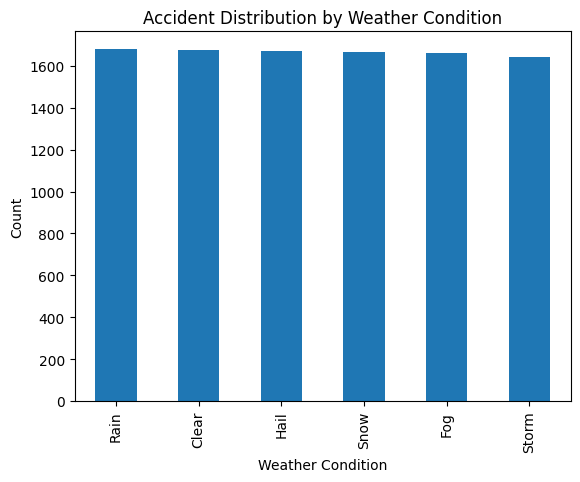

In [13]:
df["Weather Condition"].value_counts().plot(kind="bar")
plt.title("Accident Distribution by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Count")
plt.show()

In [14]:
#Total number of accidents in each month of 2023
df["Date"] = pd.to_datetime(df["Date"])
monthly_accidents_2023 = df[df["Date"].dt.year == 2023].groupby(df["Date"].dt.month)["Accident ID"].count()
print(monthly_accidents_2023)

Date
1     420
2     421
3     418
4     379
5     428
6     441
7     393
8     415
9     446
10    384
11    429
12    418
Name: Accident ID, dtype: int64


In [15]:
#Average longitude of accidents per location
avg_lng_by_location = df.groupby("Location")["Longitude"].mean()
print(avg_lng_by_location)

Location
Beijing, China      -2.363908
Berlin, Germany      0.002821
London, UK           5.959739
Mumbai, India       -8.035109
New York, USA        3.382334
Paris, France        5.302789
Sydney, Australia   -1.906986
São Paulo, Brazil    0.893695
Tokyo, Japan         3.328123
Toronto, Canada     -3.247418
Name: Longitude, dtype: float64


In [16]:
#accidents in bad weather conditions (Rain, Storm, Snow)
bad_weather_count = len(df[df["Weather Condition"].isin(["Rain", "Storm", "Snow"])])
print(f"Accidents in Bad Weather: {bad_weather_count}")

Accidents in Bad Weather: 4993


In [17]:
#Average number of casualties based on road condition
avg_casualties_by_road = df.groupby("Road Condition")["Casualties"].mean()
print(avg_casualties_by_road)

Road Condition
Dry                   5.111625
Gravel                4.971210
Icy                   4.943134
Snowy                 4.967244
Under Construction    4.993820
Wet                   4.937500
Name: Casualties, dtype: float64


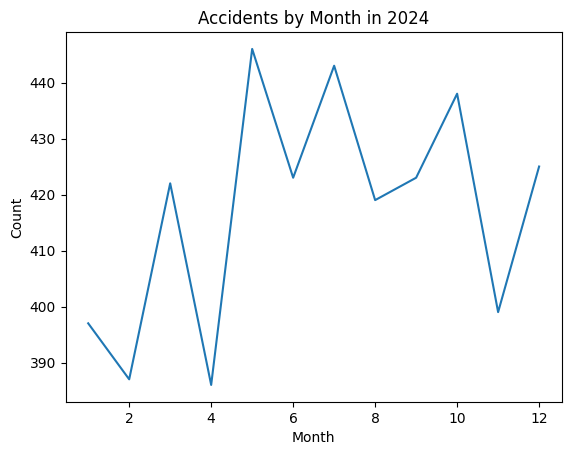

In [18]:
df[df["Date"].dt.year == 2024].groupby(df["Date"].dt.month)["Accident ID"].count().plot(kind="line")
plt.title("Accidents by Month in 2024")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()

In [19]:
#Top 5 accident causes
top_causes = df["Cause"].value_counts().nlargest(5)
print(top_causes)

Cause
Drunk Driving         1716
Reckless Driving      1685
Weather Conditions    1657
Speeding              1656
Mechanical Failure    1653
Name: count, dtype: int64


In [20]:
#Average casualties in accidents involving more than 3 vehicles
avg_casualties_multi_vehicle = df[df["Vehicles Involved"] > 3]["Casualties"].mean()
print(f"Avg Casualties (Vehicles > 3): {avg_casualties_multi_vehicle:.2f}")

Avg Casualties (Vehicles > 3): 5.01


In [21]:
#Number of accidents by city in 2023
accidents_2023_by_location = df[df["Date"].dt.year == 2023].groupby("Location")["Accident ID"].count()
print(accidents_2023_by_location)

Location
Beijing, China       503
Berlin, Germany      500
London, UK           496
Mumbai, India        485
New York, USA        513
Paris, France        504
Sydney, Australia    500
São Paulo, Brazil    516
Tokyo, Japan         497
Toronto, Canada      478
Name: Accident ID, dtype: int64


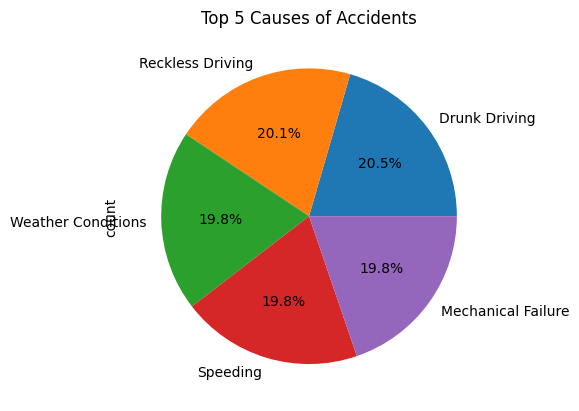

In [22]:
df["Cause"].value_counts().nlargest(5).plot(kind="pie", autopct='%1.1f%%')
plt.title("Top 5 Causes of Accidents")
plt.show()

In [23]:
#Minimum casualties recorded in bad weather conditions
min_casualties_bad_weather = df[df["Weather Condition"].isin(["Rain", "Storm", "Snow"])]["Casualties"].min()
print(f"Min Casualties in Bad Weather: {min_casualties_bad_weather}")

Min Casualties in Bad Weather: 0


In [24]:
#Average latitude of accidents by cause
avg_lat_by_cause = df.groupby("Cause")["Latitude"].mean()
print(avg_lat_by_cause)

Cause
Distracted Driving   -1.608954
Drunk Driving        -0.024852
Mechanical Failure   -2.310517
Reckless Driving      0.998383
Speeding             -0.137248
Weather Conditions   -0.242130
Name: Latitude, dtype: float64


In [25]:
#Total casualties by location
total_casualties_by_location = df.groupby("Location")["Casualties"].sum()
print(total_casualties_by_location)

Location
Beijing, China       5233
Berlin, Germany      4827
London, UK           4924
Mumbai, India        4821
New York, USA        4992
Paris, France        5004
Sydney, Australia    4937
São Paulo, Brazil    5124
Tokyo, Japan         5017
Toronto, Canada      5003
Name: Casualties, dtype: int64


In [26]:
#Maximum number of vehicles involved in a single accident
max_vehicles = df["Vehicles Involved"].max()
print(f"Max Vehicles Involved: {max_vehicles}")

Max Vehicles Involved: 5


In [27]:
#Average casualties grouped by weather condition and road condition
avg_casualties_by_weather_road = df.groupby(["Weather Condition", "Road Condition"])["Casualties"].mean()
print(avg_casualties_by_weather_road)

Weather Condition  Road Condition    
Clear              Dry                   5.057432
                   Gravel                5.053571
                   Icy                   4.902174
                   Snowy                 4.799145
                   Under Construction    4.970260
                   Wet                   5.137931
Fog                Dry                   5.152249
                   Gravel                4.966165
                   Icy                   4.979239
                   Snowy                 5.056180
                   Under Construction    5.097015
                   Wet                   5.000000
Hail               Dry                   5.277966
                   Gravel                5.110368
                   Icy                   5.011538
                   Snowy                 4.513208
                   Under Construction    5.143369
                   Wet                   4.676364
Rain               Dry                   5.329670
            

In [28]:
#Total number of accidents by country (parsed from Location)
df["Country"] = df["Location"].str.split(", ").str[-1]
accidents_by_country = df["Country"].value_counts()
print(accidents_by_country)

Country
Brazil       1032
USA          1016
China        1014
Australia    1006
Canada       1003
UK           1000
France        995
Japan         989
India         987
Germany       958
Name: count, dtype: int64


In [29]:
#Average longitude of accidents by city
avg_lng_by_location = df.groupby("Location")["Longitude"].mean()
print(avg_lng_by_location)

Location
Beijing, China      -2.363908
Berlin, Germany      0.002821
London, UK           5.959739
Mumbai, India       -8.035109
New York, USA        3.382334
Paris, France        5.302789
Sydney, Australia   -1.906986
São Paulo, Brazil    0.893695
Tokyo, Japan         3.328123
Toronto, Canada     -3.247418
Name: Longitude, dtype: float64


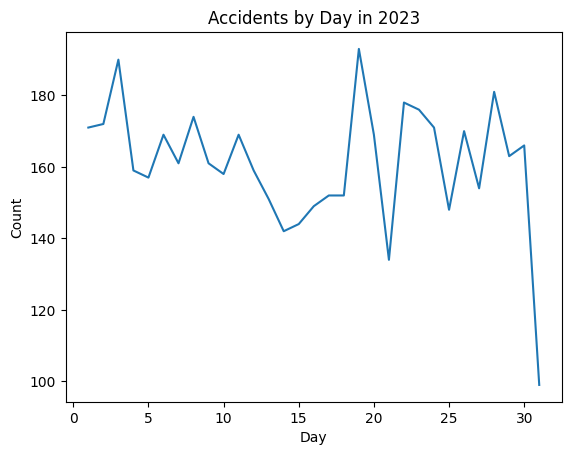

In [30]:
df[df["Date"].dt.year == 2023].groupby(df["Date"].dt.day)["Accident ID"].count().plot(kind="line")
plt.title("Accidents by Day in 2023")
plt.xlabel("Day")
plt.ylabel("Count")
plt.show()

In [31]:
#Top 5 cities with highest total casualties
top_locations_by_casualties = df.groupby("Location")["Casualties"].sum().nlargest(5)
print(top_locations_by_casualties)

Location
Beijing, China       5233
São Paulo, Brazil    5124
Tokyo, Japan         5017
Paris, France        5004
Toronto, Canada      5003
Name: Casualties, dtype: int64


In [32]:
#unique accident causes in the dataset
unique_causes = df["Cause"].nunique()
print(f"Unique Accident Causes: {unique_causes}")

Unique Accident Causes: 6


In [33]:
#Day with the highest number of accidents in 2023
top_accident_day = df[df["Date"].dt.year == 2023]["Date"].value_counts().idxmax()
print(f"Day with Most Accidents in 2023: {top_accident_day}")

Day with Most Accidents in 2023: 2023-02-22 00:00:00


In [34]:
#Average casualties per day of the week
avg_casualties_by_day = df.groupby(df["Date"].dt.day_name())["Casualties"].mean()
print(avg_casualties_by_day)

Date
Friday       5.093168
Monday       4.981362
Saturday     4.924620
Sunday       5.048645
Thursday     4.874913
Tuesday      4.977946
Wednesday    5.017379
Name: Casualties, dtype: float64


In [35]:
#Number of accidents that occurred on weekends
weekend_accidents = df[df["Date"].dt.dayofweek >= 5].shape[0]
print(f"Weekend Accidents: {weekend_accidents}")

Weekend Accidents: 2885


In [36]:
#Cities where more than 1000 accidents occurred
high_accident_cities = df["Location"].value_counts()[df["Location"].value_counts() > 1000]
print(high_accident_cities)

Location
São Paulo, Brazil    1032
New York, USA        1016
Beijing, China       1014
Sydney, Australia    1006
Toronto, Canada      1003
Name: count, dtype: int64


In [37]:
#Number of accidents per cause in 2024
accidents_by_cause_2024 = df[df["Date"].dt.year == 2024]["Cause"].value_counts()
print(accidents_by_cause_2024)

Cause
Speeding              864
Drunk Driving         852
Mechanical Failure    849
Weather Conditions    832
Reckless Driving      831
Distracted Driving    780
Name: count, dtype: int64


In [38]:
#Total accidents where both rain and bad road conditions occurred
bad_weather_road = df[(df["Weather Condition"] == "Rain") & (df["Road Condition"].isin(["Wet", "Slippery", "Flooded"]))]
print(f"Rain + Bad Road Accidents: {bad_weather_road.shape[0]}")

Rain + Bad Road Accidents: 277


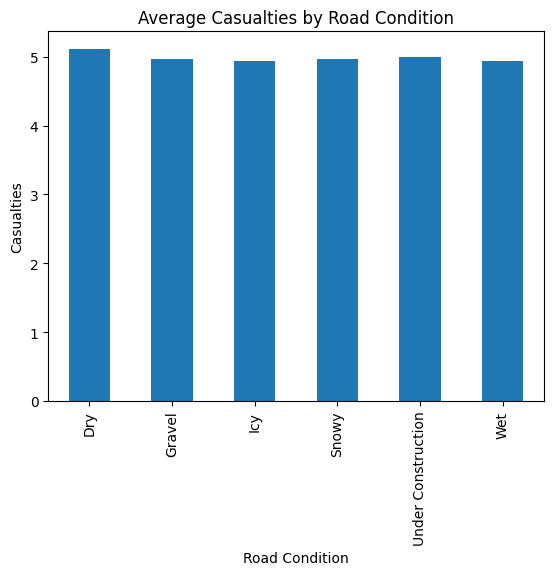

In [39]:
# Bar chart showing average casualties by road condition
df.groupby("Road Condition")["Casualties"].mean().plot(kind="bar")
plt.title("Average Casualties by Road Condition")
plt.xlabel("Road Condition")
plt.ylabel("Casualties")
plt.show()

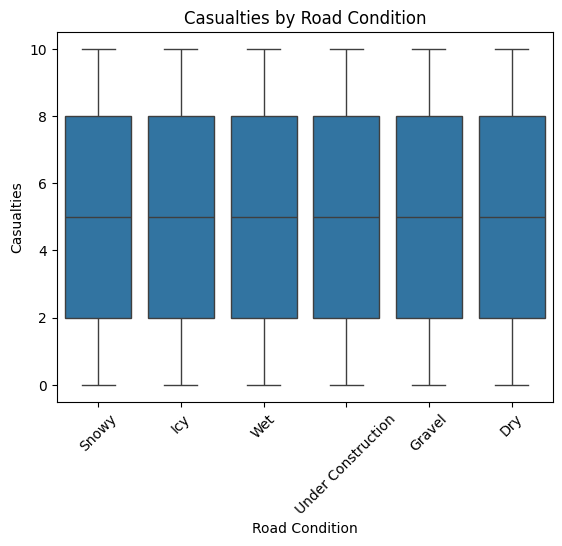

In [40]:
sns.boxplot(x="Road Condition", y="Casualties", data=df)
plt.title("Casualties by Road Condition")
plt.xticks(rotation=45)
plt.show()